# Stock Trading test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from elegantrl.train.run_tutorial import *
from elegantrl.train.run_parallel import *
from elegantrl.train.config import Arguments
from elegantrl.agents import AgentPPO, AgentDDPG, AgentA2C
from stock_env_multiple import StockEnvMultiple

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [2]:
used_tickers = ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN',
               'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS',
               'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER',
               'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS']
tickers = {x: 0 for x in used_tickers}
gamma = 0.99
max_stock = 1e2
initial_capital = 1e6
initial_stocks = np.zeros(len(tickers), dtype=np.float32)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Using stocks: ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN', 'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS', 'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER', 'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS']
| Keep cwd: ./AgentPPO_RLStockEnv-v3_(0,)
[1000000.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 63.96 30.72 135.80 46.14 146.49 25.80 42.31 0.00 41.53 52.22 77.19 143.56
 145.14 117.87 40.32 0.00 91.08 118.40 74.03 96.39 18.57 35.68 25.31 93.23
 98.81 57.48 0.00 46.95 90.12 20.41 52.29 43.02 57.82 60.75 76.57 36.61
 31.48 70.39 0.00 20.53 64.4

/Users/clarespeer/Clare/School Work/UMich/592 AI Foundations/stock-trading/stock_env_multiple.py:219: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1634272482218/work/torch/csrc/utils/tensor_new.cpp:201.)
  s_tensor = _torch.as_tensor((state,), device=device).float()


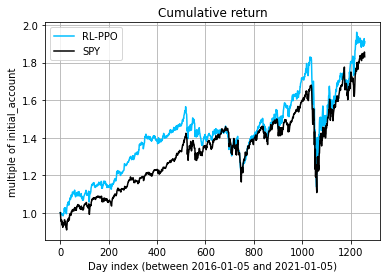

In [3]:
start_eval_date = '2016-01-05'
end_eval_date = '2021-01-05'
# used_tickers = ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN',
#            'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS',
#            'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER',
#            'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS',
#            'DRE', 'ABMD', 'WRB', 'VLO', 'PBCT', 'PTC', 'XLNX', 'AZO', 'REGN',
#            'AES', 'STE', 'DHI', 'COST', 'EMN', 'ABC', 'WAB', 'HSIC', 'EL', 'RL',
#            'BXP', 'MTD', 'VRSN', 'RSG', 'MCO', 'GRMN', 'MDLZ', 'LVS', 'CE', 'UAA',
#            'FIS', 'CBRE']





agentPPO = AgentPPO.AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()?
agentPPO.if_use_gae = True
agentPPO.lambda_entropy = 0.01

initial_stocks = np.zeros([len(tickers)]).tolist()
print(initial_stocks)

env_eval = StockEnvMultiple(tickers=tickers,
                            begin_date=start_eval_date,
                            end_date=end_eval_date)


agentPPO.if_on_policy = False
args = Arguments(env_eval, agentPPO)

args.if_remove = False
args.cwd = './AgentPPO_RLStockEnv-v3_(0,)'
args.gamma = gamma
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10
args.repeat_times = 2 ** 3
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = False
args.target_return = 1.1e7

args.rollout_num = 6 # the number of rollout workers (larger is not always faster)
args.init_before_training()

ppo_returns, spy = env_eval.draw_cumulative_return(args, torch, 'PPO', 'deepskyblue')


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Using stocks: ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN', 'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS', 'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER', 'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS']
| Keep cwd: ./AgentDDPG_RLStockEnv-v3_(0,)
[1000000.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 63.96 30.72 135.80 46.14 146.49 25.80 42.31 0.00 41.53 52.22 77.19 143.56
 145.14 117.87 40.32 0.00 91.08 118.40 74.03 96.39 18.57 35.68 25.31 93.23
 98.81 57.48 0.00 46.95 90.12 20.41 52.29 43.02 57.82 60.75 76.57 36.61
 31.48 70.39 0.00 20.53 64.

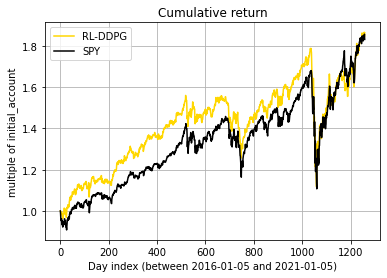

In [4]:
start_eval_date = '2016-01-05'
end_eval_date = '2021-01-05'
# used_tickers = ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN',
#            'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS',
#            'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER',
#            'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS',
#            'DRE', 'ABMD', 'WRB', 'VLO', 'PBCT', 'PTC', 'XLNX', 'AZO', 'REGN',
#            'AES', 'STE', 'DHI', 'COST', 'EMN', 'ABC', 'WAB', 'HSIC', 'EL', 'RL',
#            'BXP', 'MTD', 'VRSN', 'RSG', 'MCO', 'GRMN', 'MDLZ', 'LVS', 'CE', 'UAA',
#            'FIS', 'CBRE']

tickers = {x: 0 for x in used_tickers}



agentDDPG = AgentDDPG.AgentDDPG() # AgentSAC(), AgentTD3(), AgentDDPG()?
agentDDPG.if_use_gae = True
agentDDPG.explore_noise = 0.3

initial_stocks = np.zeros([len(tickers)]).tolist()
print(initial_stocks)

env_eval = StockEnvMultiple(tickers=tickers,
                            begin_date=start_eval_date,
                            end_date=end_eval_date)


agentDDPG.if_on_policy = False
args = Arguments(env_eval, agentDDPG)

args.if_remove = False
args.cwd = './AgentDDPG_RLStockEnv-v3_(0,)'
args.gamma = gamma
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10
args.repeat_times = 2 ** 3
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = False
args.target_return = 1.1e7

args.rollout_num = 6 # the number of rollout workers (larger is not always faster)
args.init_before_training()

ddpg_returns, spy = env_eval.draw_cumulative_return(args, torch, 'DDPG', 'gold')

| AgentA2C: A2C or A3C is worse than PPO. We provide AgentA2C code just for teaching.| Without TrustRegion, A2C needs special hyper-parameters, such as smaller repeat_times.
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Using stocks: ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN', 'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS', 'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER', 'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS']
| Keep cwd: ./AgentA2C_RLStockEnv-v3_(0,)
[1000000.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 63.96 30.72 135.80 46.14 146.49 25.80 42.31 0.00 41.53 52.22 77.19 143.56
 

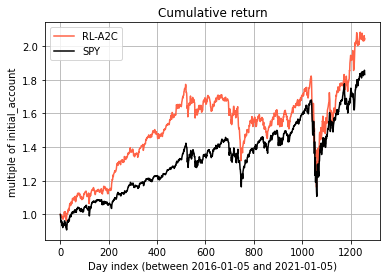

In [5]:
start_eval_date = '2016-01-05'
end_eval_date = '2021-01-05'
# used_tickers = ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN',
#            'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS',
#            'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER',
#            'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS',
#            'DRE', 'ABMD', 'WRB', 'VLO', 'PBCT', 'PTC', 'XLNX', 'AZO', 'REGN',
#            'AES', 'STE', 'DHI', 'COST', 'EMN', 'ABC', 'WAB', 'HSIC', 'EL', 'RL',
#            'BXP', 'MTD', 'VRSN', 'RSG', 'MCO', 'GRMN', 'MDLZ', 'LVS', 'CE', 'UAA',
#            'FIS', 'CBRE']

tickers = {x: 0 for x in used_tickers}



AgentA2C = AgentA2C.AgentA2C() # AgentSAC(), AgentTD3(), AgentDDPG()?
AgentA2C.if_use_gae = True

initial_stocks = np.zeros([len(tickers)]).tolist()
print(initial_stocks)

env_eval = StockEnvMultiple(tickers=tickers,
                            begin_date=start_eval_date,
                            end_date=end_eval_date)


AgentA2C.if_on_policy = False
args = Arguments(env_eval, AgentA2C)

args.if_remove = False
args.cwd = './AgentA2C_RLStockEnv-v3_(0,)'
args.gamma = gamma
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10
args.repeat_times = 2 ** 3
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = False
args.target_return = 1.1e7

args.rollout_num = 6 # the number of rollout workers (larger is not always faster)
args.init_before_training()

a2c_returns, spy = env_eval.draw_cumulative_return(args, torch, 'A2C', 'tomato')

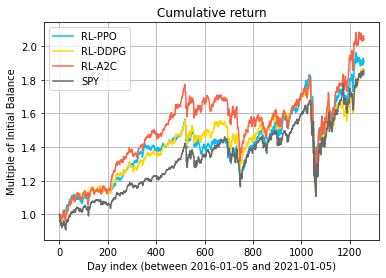

In [6]:
plt.plot(ppo_returns, 'deepskyblue')
plt.plot(ddpg_returns, 'gold')
plt.plot(a2c_returns, 'tomato')
plt.plot(spy, 'dimgray')
plt.grid()
plt.title('Cumulative return')
plt.xlabel(f'Day index (between {start_eval_date} and {end_eval_date})')
plt.ylabel('Multiple of Initial Balance')
plt.legend(['RL-PPO', 'RL-DDPG', 'RL-A2C', 'SPY'])
plt.savefig('model_comparison.png')
plt.show()